# CéCI Training Days
# Introduction to the Julia programming language

The goal of this short exercise notebook is to walk user through the basic functionalities of the Julia programming language. After completion, you will have learned the following

- Basic functionalities of the Julia REPL
- Write simple functions and call them.
- Manipulate arrays and broadcasting.
- Make plots using the `Plots` package


While not necessary, the use of AI tools like ChatGPT or Claude can be much faster and helpful to solve these exercises than digging through the documentation. It is therefore recommended that you do so. For extra challenge, you may of course go without AI tools.

## 1 Command Line

For the exercises in this session, you'll need a terminal. If you're reading this notebook in VSCode, this can be done by clicking on `Terminal > New Terminal`.

### Exercise 1.1: Welcome to the REPL

Open a terminal and enter `julia` to land in the Julia *REPL* (*Read Eval Print Loop*).

### Exercise 1.2: Hello World

Run the command `println("Hello, World!")` in a Julia REPL.

### Exercise 1.3: Help!

Press the `?` key on your keyboard to enter `help` mode. Write the name of a function, for example, `println` to display its documentation. Press the return key to go back to normal mode.

### Exercise 1.4: Package Manager

Press the `]` key on your keyboard to enter the *package manager*. Run the `status` command to display the list of currently installed packages. Press the return key to go back to normal mode.

### Exercise 1.5 Shell mode

Press the `;` key to enter shell mode. You can run basic shell commands in this mode. Press return to go back to normal mode.

## 2 Basic Syntax

From here on, everything will happen in notebook cells.

### Exercise 2.1

Create a variable `a` with value 42, then compute the value of `a^2 + a + 41`.

In [1]:
# Use this cell to answer the question
a = 42
a^2 + a + 41

1847

### Exercise 2.2

Write a  function `p(x)` which takes as argument a real number `x` and returns
$$ p(x) = x^2 + x + 41. $$

**Indication** : Use an inline definition.

In [2]:
p(x) = x^2 + x + 41

p (generic function with 1 method)

### Exercise 2.3

Write a function `isprime(n)` which takes as arguement a positive integer $n$ and returns `true` if $n$ is a prime number and `false` otherwise.

**Indication** : The remainder of the euclidean division of $x$ by $y$ can be obtained with `mod(x,y)`.

In [9]:
function isprime(n)
    n <= 1 && return false
    n == 2 && return true
    iseven(n) && return false
    i = 3
    while i^2 <= n
        if mod(n,i) == 0
            return false
        end
        i += 2
    end
    return true
end

isprime (generic function with 1 method)

In [11]:
isprime.(1:20)

20-element BitVector:
 0
 1
 1
 0
 1
 0
 1
 0
 0
 0
 1
 0
 1
 0
 0
 0
 1
 0
 1
 0

## 3 Arrays

### Exercise 3.1

Create a vector of 10 elements filled with zeros using the `zeros` function and write the value `42` in its fifth element.

In [12]:
a = zeros(10)
a[5] = 42

42

### Exercise 3.2

Use an array comprehension to obtain the set of integers between 0 and 100 such that `p(n)` is prime, where `p` is the polynomial defined in exercise 2.2

In [20]:
primes = [n for n in 0:100 if isprime(p(n))]

87-element Vector{Int64}:
   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
   ⋮
  90
  92
  93
  94
  95
  97
  98
  99
 100

### Exercise 3.3

Write a function `vandermonde(x, n)` which takes as argument a vector of numbers $x = [x_1,\dots,x_m]^T \in \mathbb{R}^m$ and a positive integer $n$ et and returns the *Vandermonde matrix*
$$ V = \begin{bmatrix}
        1 & x_1 & x_1^2 & \dots & x_1^n \\
        1 & x_2 & x_2^2 & \dots & x_2^n \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        1 & x_m & x_m^2 & \dots & x_m^n
    \end{bmatrix} \in \R^{m \times (n+1)}. $$

**Indication** : Use an array comprehension.

In [14]:
function vandermonde(x, n)
    return [x[i]^j for i in eachindex(x), j in 0:n]
end

vandermonde (generic function with 1 method)

In [15]:
vandermonde([1,2,3], 3)

3×4 Matrix{Int64}:
 1  1  1   1
 1  2  4   8
 1  3  9  27

### Exercise 3.4

Let $x = [1, 2, 3, 4, 5]^T$. Use the function `vandermonde(x,4)` from the previous question to obtain the square matrix $V \in \mathbb{R}^{5\times 5}$ and solve the linear system
$$ V y = b, $$
where $b \in \mathbb{R}^5$ is the vector such that $b_i = p(x_i)$, where $p$ is the function defined in exercise 2.2.

**Indication**: As in Matlab, the solution of a linear system $Ax = b$ can be obtained with `A \ b`.

In [16]:
x = 1:5
V = vandermonde(x,4)
b = p.(x)

V \ b

5-element Vector{Float64}:
 41.0
  1.0
  1.0
 -0.0
 -0.0

## 4 Figures

This last sections is there to introduce the `Plots` package which can be used to create plots and figures.

- Official `Plots` Documentation: https://docs.juliaplots.org/latest/tutorial/
- Examples Gallery: https://goropikari.github.io/PlotsGallery.jl/

### Exercise 5.1

Use the function `plot` to display the function $p$ from exercise 2.2 on the interval $[0,100]$.

**Indication** : The function `LinRange(a,b,n)` produces a vector of $n$ points uniformly distributed between $a$ and $b$.

### Exercise 5.2

Use the `scatter!` function to add on the same figure points on the value of $p$ at integer values between 0 and 100 such that `p(n)` is prime.

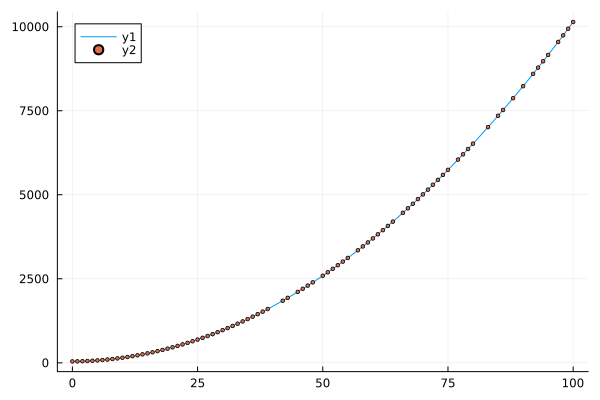

In [21]:
using Plots
ts = LinRange(0,100,100)

plot(ts, p.(ts))
scatter!(primes, p.(primes), markersize=2)

### Exercise 5.4 (Optional)

The file `../data/pulsar.txt` contains a matrix whose columns are radio emission curves from the pulsar PSR B1919+21, discovered in 1967 by physicist Jocelyne Bell. It was the very first identified radio pulsar.

1. Read the data using the `readdlm` from the `DelimitedFiles` package, and plot them. Note that when passing a matrix as an argument to `plot`, each column will be displayed as a separate curve. For this exercise, however, you'll need to use a loop.
2. Use the keyword argument `color = :black` to change the color of the curves.
3.  Use the keyword argument `linewidth = 2` to change the thickness of the curves.
4. Apply a vertical shift to each curve, such that the shift for curve $j$ is proportional to $80-j$. The simplest way to do that is to construct a matrix that is added to the data before plotting.
5. Add the argument `fill = (0,:white)` in your call to `plot!`.

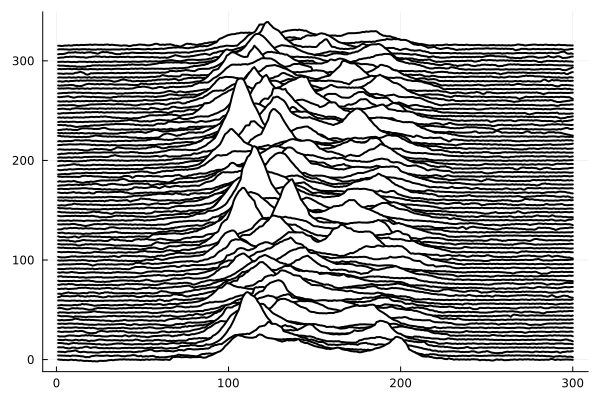

In [26]:
using DelimitedFiles

data = readdlm("../data/pulsar.txt")
offsets = [80-j for i in 1:300, j in 1:80]

begin
    plt = plot()
    for i in axes(data, 2)
        plot!(data[:,i] .+ 4 .* offsets[:,i],
            label = "",
            color = :black,
            linewidth = 2,
            fill = (0,:white)        
        )
    end
    plt
end